## Importing necessary libraries

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler as MM

### Reading the data

In [65]:
df = pd.read_csv('Data/MBG.DE.csv')
print(df)

            Date       Open       High        Low      Close  Adj Close  \
0     2014-05-30  58.047653  58.222321  57.889622  57.972797  32.494484   
1     2014-06-02  58.222321  58.496799  57.207588  57.656734  32.317326   
2     2014-06-03  57.864670  58.047653  57.398891  57.956161  32.485165   
3     2014-06-04  57.947845  57.947845  57.024605  57.648418  32.312664   
4     2014-06-05  57.731590  58.713055  57.448795  58.480164  32.778873   
...          ...        ...        ...        ...        ...        ...   
2536  2024-05-23  65.830002  66.110001  65.309998  65.709999  65.709999   
2537  2024-05-24  65.110001  66.320000  65.040001  66.029999  66.029999   
2538  2024-05-27  66.209999  66.599998  65.900002  66.290001  66.290001   
2539  2024-05-28  66.550003  66.989998  66.120003  66.379997  66.379997   
2540  2024-05-29  66.150002  66.239998  65.349998  65.470001  65.470001   

       Volume  
0     3592922  
1     2759788  
2     2880702  
3     3117640  
4     5463058  
...

## Checking for null values

In [66]:
print("Number of null values in the dataset :-\n", df.isna().sum())

Number of null values in the dataset :-
 Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


## Normalizing the columns

In [67]:
scaler = MM(feature_range = (0, 1))

select_cols = df.select_dtypes(include = ['float64', 'int64']).columns

# Fit and transform the data, then convert it back to a DataFrame
df[select_cols] = scaler.fit_transform(df[select_cols])

print(df.head())

         Date      Open      High       Low     Close  Adj Close    Volume
0  2014-05-30  0.656717  0.642656  0.672410  0.647194   0.327338  0.147029
1  2014-06-02  0.659586  0.647180  0.661061  0.642055   0.324249  0.112935
2  2014-06-03  0.653712  0.639778  0.664245  0.646924   0.327176  0.117883
3  2014-06-04  0.655078  0.638133  0.658017  0.641920   0.324168  0.127579
4  2014-06-05  0.651526  0.650744  0.665075  0.655443   0.332297  0.223558


## Choosing a split point in the data

### The split will be TRAIN = 80% and TEST = 20%; The shape of the dataframe is [2541 rows x 7 columns]; 
### the split point `Tp` will be `2033`; this is the training part and remaining is testing part.

In [68]:
Tp = 2033

def plot_train_points(col = 'Open', Tp = 2033) :

    plt.figure(figsize = (15, 4))
    if col == 'Open' :
        plt.title("Open Stock price for first {} data points".format(Tp), fontsize = 16)
        plt.plot(df['Open'][: Tp], c = 'k', lw = 1)

    if col == 'High' :
        plt.title("Highest Stock price for first {} data points".format(Tp), fontsize = 16)
        plt.plot(df['High'][: Tp], c = 'k', lw = 1)

    if col == 'Low' :
        plt.title("Lowest Stock price for first {} data points".format(Tp), fontsize = 16)
        plt.plot(df['Low'][: Tp], c = 'k', lw = 1)

    if col == 'Close' :
        plt.title("Closing Stock price for first {} data points".format(Tp), fontsize = 16)
        plt.plot(df['Close'][: Tp], c = 'k', lw = 1)

    if col == 'Adj Close' :
        plt.title("Adjusted Closing Stock price for first {} data points".format(Tp), fontsize = 16)
        plt.plot(df['Adj Close'][: Tp], c = 'k', lw = 1)

    if col == 'Volume' :
        plt.title("Number of shares traded during the day for first {} data points".format(Tp), fontsize = 16)
        plt.plot(df['Volume'][: Tp], c = 'k', lw = 1)

    plt.grid(True)
    plt.xticks(fontsize = 14)
    plt.yticks(fontsize = 14)
    plt.show()

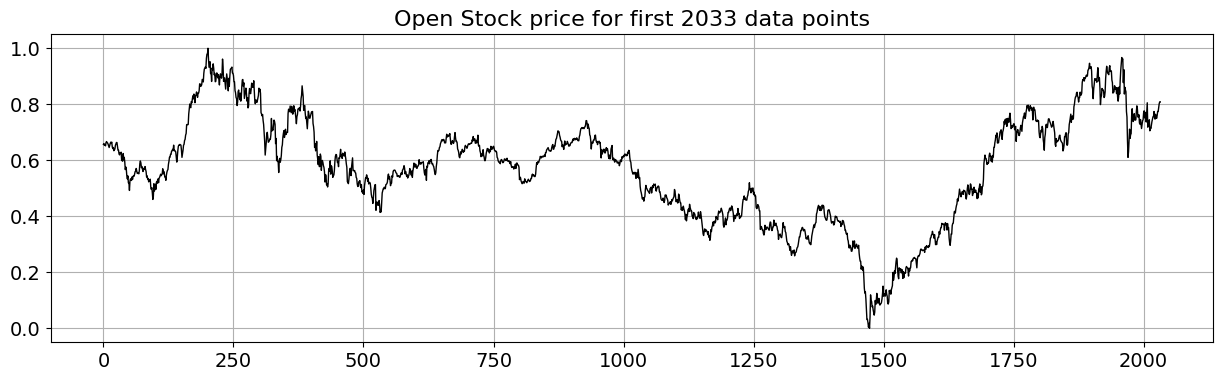

In [69]:
plot_train_points('Open')

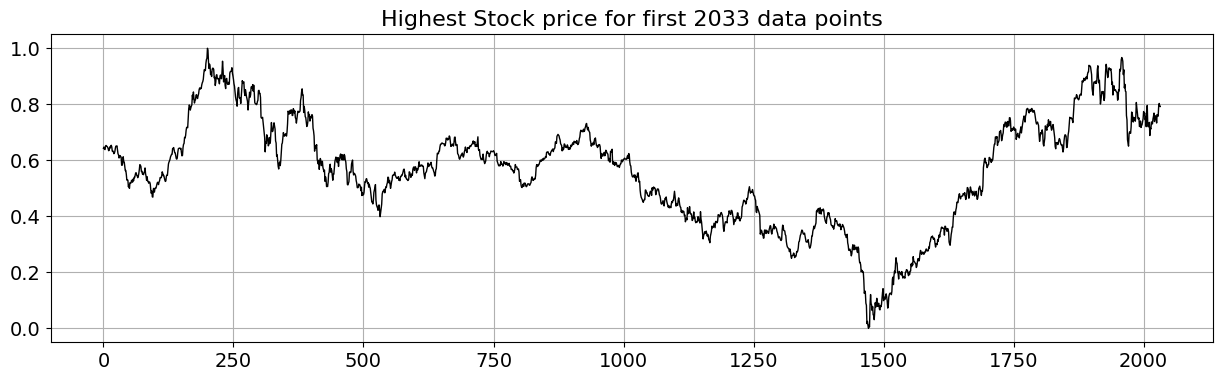

In [70]:
plot_train_points('High')

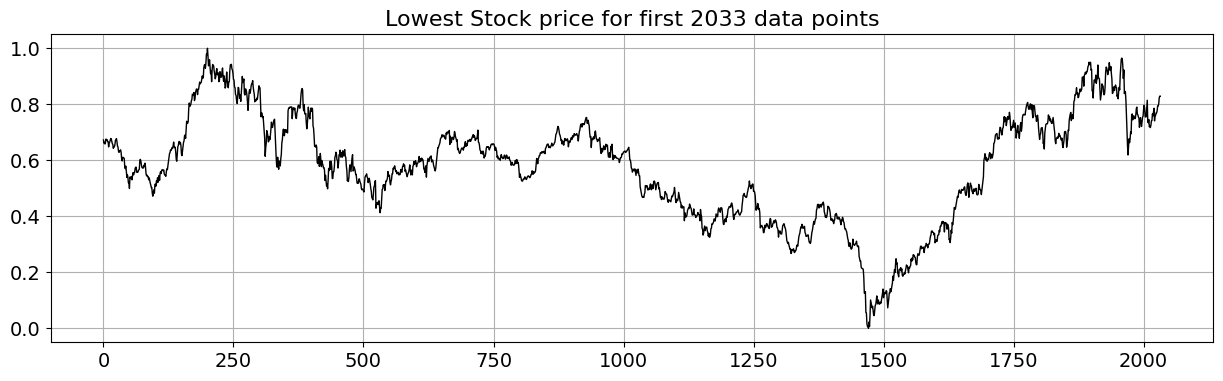

In [71]:
plot_train_points('Low')

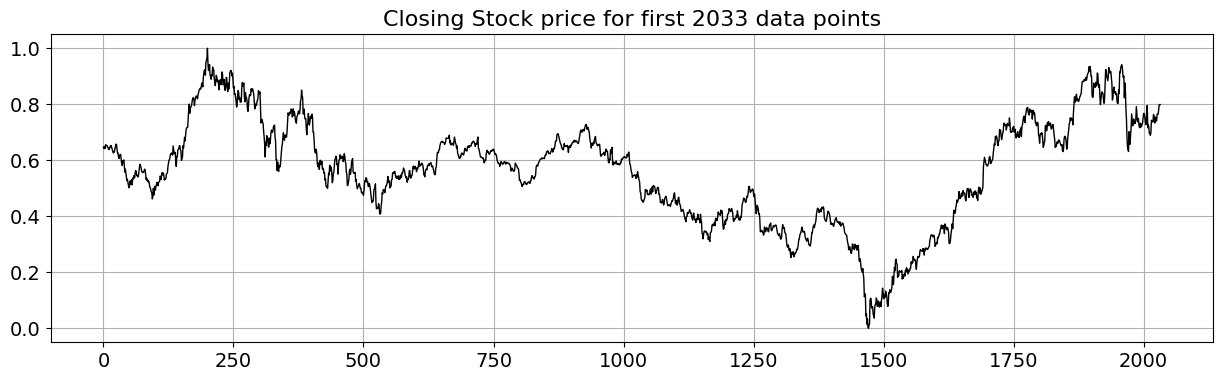

In [72]:
plot_train_points('Close')

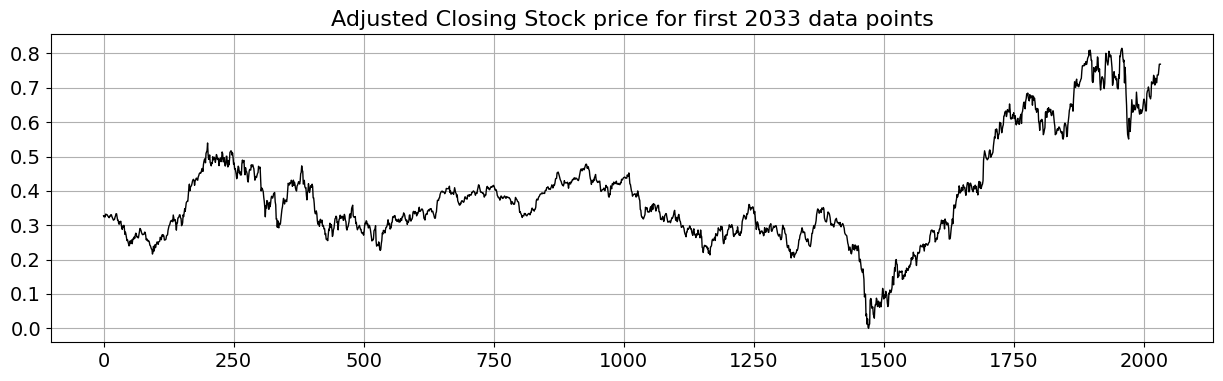

In [73]:
plot_train_points('Adj Close')

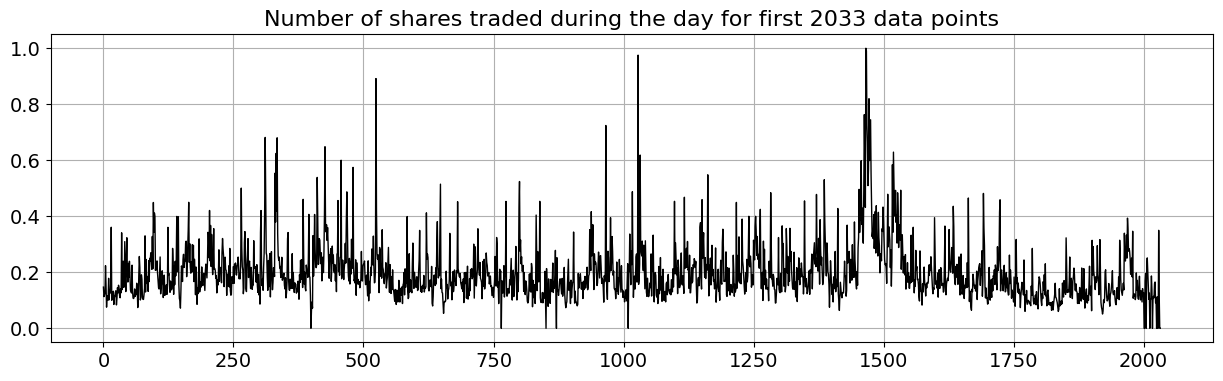

In [74]:
plot_train_points('Volume')

## Train - Test splits on the Tp = 2033

In [75]:
train = np.array(df['Close'][: Tp])
test = np.array(df['Close'][Tp : ])

In [76]:
print("Train data length :", train.shape)
print("Test data length :", test.shape)

Train data length : (2033,)
Test data length : (508,)


In [77]:
train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

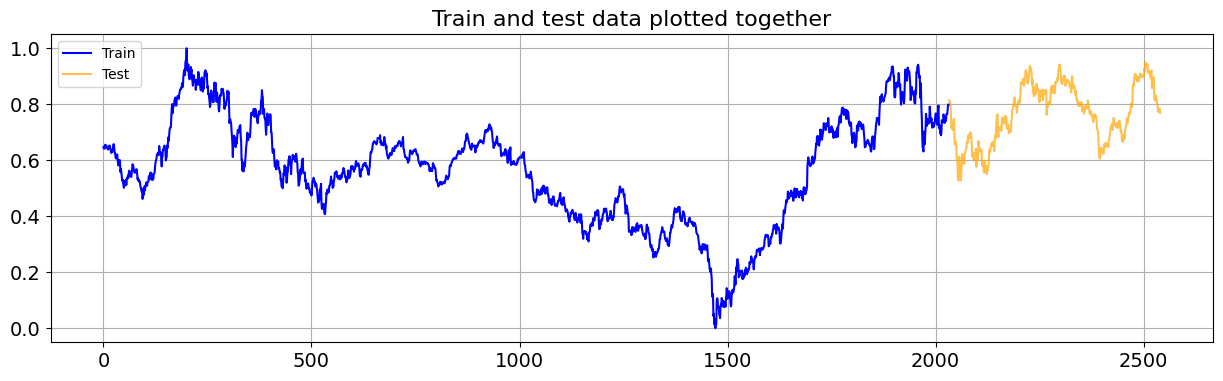

In [78]:
plt.figure(figsize = (15, 4))
plt.title("Train and test data plotted together",fontsize = 16)
plt.plot(np.arange(Tp), train, c = 'blue')
plt.plot(np.arange(Tp, 2541),test, c = 'orange',alpha = 0.7)
plt.legend(['Train', 'Test'])
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Choose the embedding or step size

LSTM model requires a step value that contains *n* number of elements as an input sequence.

Suppose `x = {1,2,3,4,5,6,7,8,9,10}`

For `step=1`, x input and its y prediction become:

| x | y |
|---|---|
| 1 | 2 |
| 2 | 3 |
| 3 | 4 |
| ... | ... |
| 9 | 10 |

For `step=3`, x and y contain:

| x     | y |
|-------|---|
| 1,2,3 | 4 |
| 2,3,4 | 5 |
| 3,4,5 | 6 |
| ...   | ... |
| 7,8,9 | 10 |

Here, we choose `step = 60`. In more complex LSTM and in particular for text processing, this is also called **embedding size**. The idea here is that we are assuming that 60 previous stock sprices are enough to predict the 61st stock price, and so on.


In [79]:
step = 10

In [80]:
# add step elements into train and test
test = np.append(test, np.repeat(test[-1,], step))
train = np.append(train, np.repeat(train[-1,], step))

In [81]:
print("Train data length:", train.shape)
print("Test data length:", test.shape)

Train data length: (2043,)
Test data length: (518,)


## Converting to multidimensional array

We will now convert test and train data into the matrix with the initialized step value 

In [82]:
def convertToMatrix(data, step) :
    X, Y = [], []

    for i in range(len(data) - step) :
        d = i + step
        X.append(data[i : d, ])
        Y.append(data[d, ])
    
    return np.array(X), np.array(Y)

In [83]:
trainX, trainY = convertToMatrix(train, step)
testX, testY = convertToMatrix(test, step)

In [84]:
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [85]:
print("Training data shape:", trainX.shape,', ',trainY.shape)
print("Test data shape:", testX.shape,', ',testY.shape)

Training data shape: (2033, 1, 10) ,  (2033,)
Test data shape: (508, 1, 10) ,  (508,)


## Modeling

### Keras model with `LSTM` layer

We build a simple function to define the LSTM model. It uses a single neuron for the output layer because we are predicting a real-valued number here. As activation, it uses the ReLU function. Following arguments are supported.

- neurons in the LSTM layer
- embedding length (i.e. the step length we chose)
- neurons in the densely connected layer
- learning rate


In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import Callback

In [89]:
def build_lstm(num_units = 128, embedding = 4, num_dense = 32, learning_rate = 0.001) :
    """
    Builds and compiles a simple RNN model
    Arguments:
              num_units: Number of units of the LSTM layer
              embedding: Embedding length
              num_dense: Number of neurons in the dense layer followed by the RNN layer
              learning_rate: Learning rate (uses RMSprop optimizer)
    Returns:
              A compiled Keras model.
    """
    model = Sequential()
    
    #1st lstm layer with input shape
    model.add(LSTM(units = num_units, input_shape = (1, embedding), activation = "relu", return_sequences = True))
    model.add(Dropout(0.15))

    #2nd lstm layer
    model.add(LSTM(units = num_units, activation = "relu", return_sequences = True))
    model.add(Dropout(0.15))

    #3rd LSTM layer
    model.add(LSTM(units = 50, activation = "relu"))
    model.add(Dropout(0.15))
    
    #Dense layer
    model.add(Dense(num_dense, activation = "relu"))


    model.compile(loss = 'mean_squared_error', optimizer = RMSprop(learning_rate = learning_rate), metrics = ['mse'])
    
    return model

In [90]:
model_lstm_stock = build_lstm(num_units = 100, num_dense = 1, embedding = 10, learning_rate = 0.0001)

In [91]:
model_lstm_stock.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_9 (LSTM)                   │ (None, 1, 100)         │        44,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_10 (LSTM)                  │ (None, 1, 100)         │        80,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 1, 100)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_11 (LSTM)                  │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 155,051 (605.67 KB)

 Trainable params: 155,051 (605.67 KB)

 Non-trainable params: 0 (0.00 B)

## A simple Keras `Callback` class to print progress of the training at regular epoch interval

Since the LSTM training is usually long, we want to see regular updates about epochs finishing. However, we may not want to see this update every epoch as that may flood the output stream. Therefore, we write a simple custom `Callback` function to print the finishing update every 50th epoch. You can think of adding other bells and whistles to this function to print error and other metrics dynamically.

In [92]:
class MyCallback(Callback):
    def on_epoch_end(self, epoch, logs = None) : 
        if (epoch + 1) % 50 == 0 and epoch > 0 :
            print("Epoch number {} done".format(epoch + 1))

In [93]:
batch_size = 16
num_epochs = 1000

## Model Training

In [94]:
model_lstm_stock.fit(trainX,trainY, 
          epochs = num_epochs, 
          batch_size = batch_size, 
          callbacks=[MyCallback()], verbose = 0)

Epoch number 50 done
Epoch number 100 done
Epoch number 150 done
Epoch number 200 done
Epoch number 250 done
Epoch number 300 done
Epoch number 350 done
Epoch number 400 done
Epoch number 450 done
Epoch number 500 done
Epoch number 550 done
Epoch number 600 done
Epoch number 650 done
Epoch number 700 done
Epoch number 750 done
Epoch number 800 done
Epoch number 850 done
Epoch number 900 done
Epoch number 950 done
Epoch number 1000 done


## Plot RMSE loss over epochs

Note that the `loss` metric available in the history attribute of the model is the MSE loss and you have to take a square-root to compute the RMSE loss.

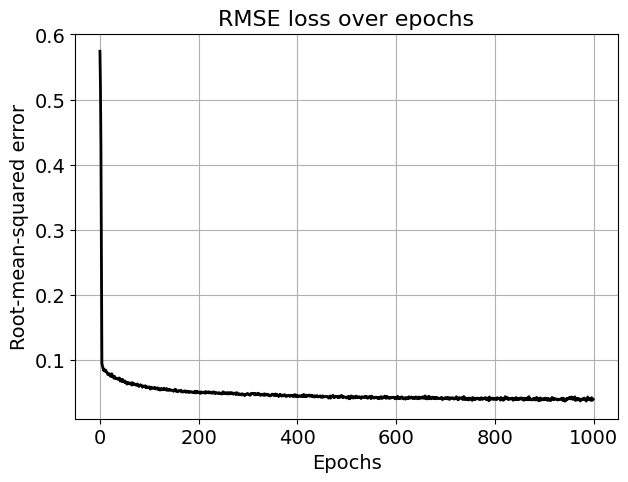

In [95]:
plt.figure(figsize = (7,5))
plt.title("RMSE loss over epochs",fontsize = 16)
plt.plot(np.sqrt(model_lstm_stock.history.history['loss']), c = 'k', lw = 2)
plt.grid(True)
plt.xlabel("Epochs", fontsize = 14)
plt.ylabel("Root-mean-squared error",fontsize = 14)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.show()

## Result and Analysis

### What Did the Model See While Training?

We are emphasizing and showing again what exactly the model saw during training. If you look above, the model fitting code is:

```python
model_rainfall.fit(trainX, trainY, 
                   epochs=num_epochs, 
                   batch_size=batch_size, 
                   callbacks=[MyCallback()], 
                   verbose=0)

So, the model was fitted with `trainX` which is plotted below, and `trainY` which is just the 60 step shifted and shaped vector.

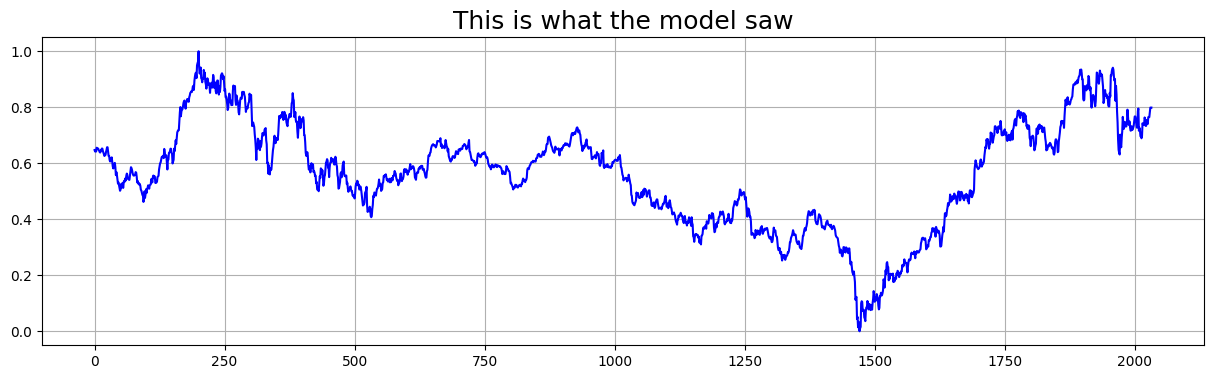

In [96]:
plt.figure(figsize = (15, 4))
plt.title("This is what the model saw", fontsize = 18)
plt.plot(trainX[:, 0][:, 0], c = 'blue')
plt.grid(True)
plt.show()

## Now predict the future points

Now, we can generate predictions for the future by passing `testX` to the trained model.

In [97]:
trainPredict = model_lstm_stock.predict(trainX)
testPredict = model_lstm_stock.predict(testX)
predicted = np.concatenate((trainPredict, testPredict), axis = 0)

64/64 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


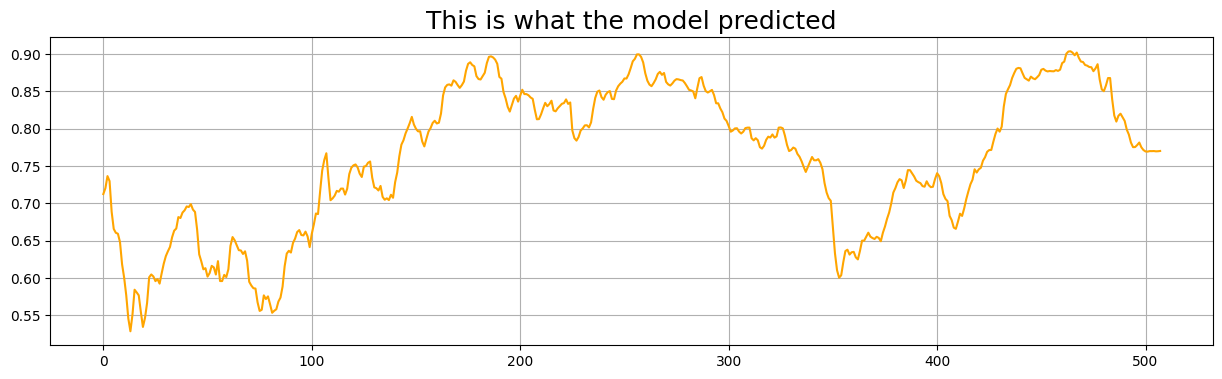

In [98]:
plt.figure(figsize = (15, 4))
plt.title("This is what the model predicted", fontsize = 18)
plt.plot(testPredict, c = 'orange')
plt.grid(True)
plt.show()

# Ground Truth vs. Model Predictions

In the following plot, we compare the ground truth data with the model predictions to illustrate how well the model follows the general trends in the ground truth. Given 80% of the data was used for training

**Key Points:**
- The vertical red line denotes the boundary between the train and test splits.
- The plot reveals that while the model predictions closely follow the trends of the ground truth, there are some noticeable discrepancies.
- Issues include:
  - Some unusually low values

These errors can potentially be addressed through post-processing or by improving the model with proper hyperparameter tuning.



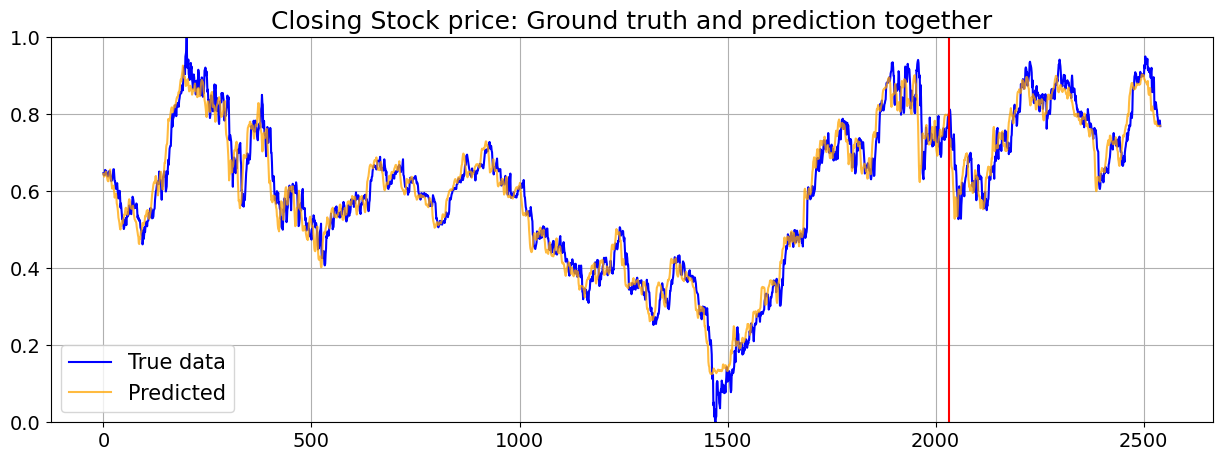

In [99]:
index = df.index.values

plt.figure(figsize = (15, 5))
plt.title("Closing Stock price: Ground truth and prediction together", fontsize = 18)
plt.plot(index, df['Close'], c = 'blue')
plt.plot(index, predicted, c = 'orange', alpha = 0.75)
plt.legend(['True data','Predicted'], fontsize = 15)
plt.axvline(x = Tp, c = "r")
plt.grid(True)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.ylim(0, 1)
plt.show()

In [100]:
N = 2541  # Define the upper limit for the index

# Ensure predicted and df['Close'] values are reshaped correctly
predicted_values = predicted[Tp : N].reshape(-1)
actual_values = df['Close'][Tp : N].values.reshape(-1)

# Calculate the errors
error = predicted_values - actual_values

# Flatten the error array if necessary
error = np.array(error).ravel()

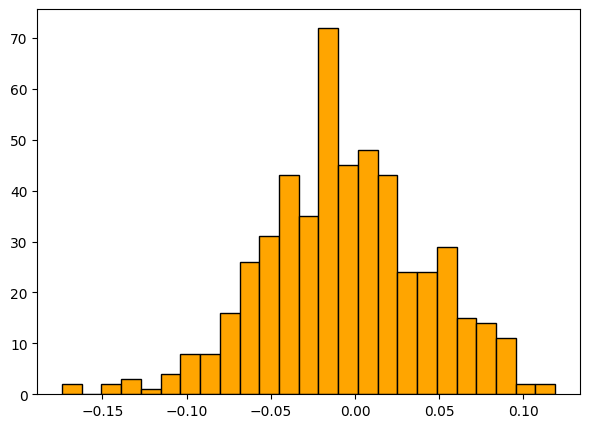

In [101]:
plt.figure(figsize = (7,5))
plt.hist(error, bins = 25, edgecolor = 'k', color = 'orange')
plt.show()

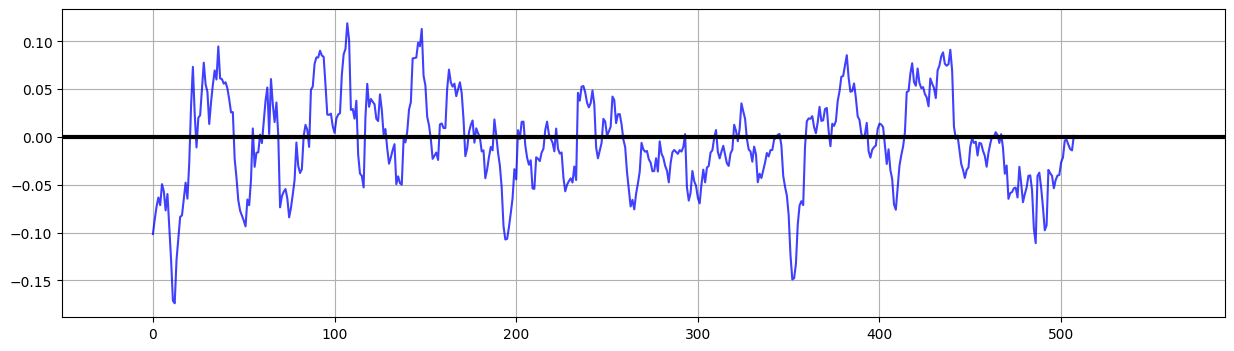

In [102]:
plt.figure(figsize = (15, 4))
plt.plot(error,c = 'blue', alpha = 0.75)
plt.hlines(y = 0, xmin = -50, xmax = 590, color = 'k', lw = 3)
plt.xlim(-50, 590)
plt.grid(True)
plt.show()

In [103]:
from sklearn.metrics import mean_squared_error as MSE, mean_absolute_error as MAE, r2_score

# Assume testX and testY are already scaled appropriately
predicted = model_lstm_stock.predict(testX)

# Evaluate the model using the scaled values directly
mse = MSE(testY, predicted)
rmse = np.sqrt(mse)
mae = MAE(testY, predicted)
r2 = r2_score(testY, predicted)


print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared (R2): {r2}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Mean Squared Error (MSE): 0.00046787678058046636
Root Mean Squared Error (RMSE): 0.021630459555461747
Mean Absolute Error (MAE): 0.01673517789573729
R-squared (R2): 0.9566569774833419
